<a href="https://colab.research.google.com/github/Adithyanm007/stroke_prediction_system_Using_ML/blob/main/Mini_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.Data

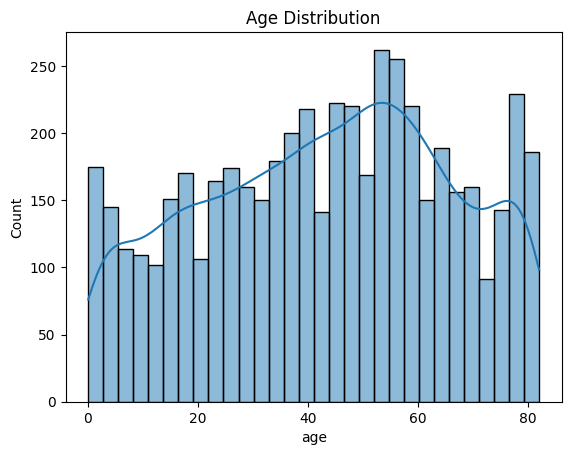

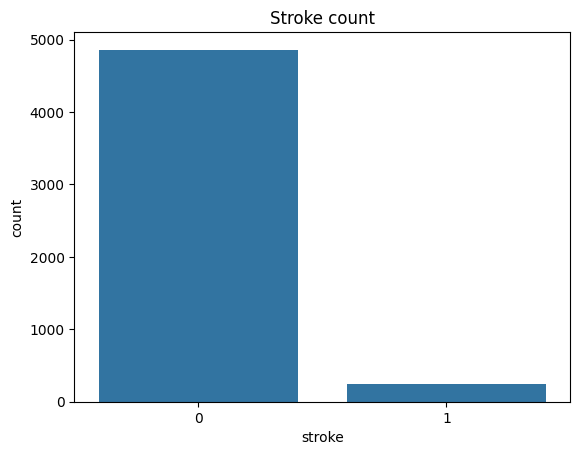

Accuracy: 0.7504892367906066
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.17      0.79      0.28        62

    accuracy                           0.75      1022
   macro avg       0.58      0.77      0.56      1022
weighted avg       0.93      0.75      0.81      1022

Confusion Matrix:
 [[718 242]
 [ 13  49]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mount drive and load data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Miniproject/healthcare-dataset-stroke-data.csv")

print(df.head())
df.info()
print(df.describe())
print(df['stroke'].value_counts())

# Visualizations
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='stroke', data=df)
plt.title("Stroke count")
plt.show()

# Fill missing BMI values
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Strip whitespace in column names
df.columns = df.columns.str.strip()

# Encode all categorical columns at once
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split into features and target
X = df.drop(['stroke', 'id'], axis=1)
y = df['stroke']

# Train/Test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    random_state=42
)

# Train the model
xgb_model.fit(x_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_xgb)
report = classification_report(y_test, y_pred_xgb, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)



XGBoost Accuracy: 0.9187866927592955
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.24      0.16      0.19        62

    accuracy                           0.92      1022
   macro avg       0.60      0.56      0.58      1022
weighted avg       0.90      0.92      0.91      1022

Confusion Matrix:
 [[929  31]
 [ 52  10]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:42:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
y_proba = xgb_model.predict_proba(x_test)[:, 1]

In [ ]:
threshold = 0.3
y_pred_new = (y_proba >= threshold).astype(int)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_new, average='binary')
print(f"At threshold {threshold}: Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}")


At threshold 0.3: Precision=0.24, Recall=0.26, F1=0.25


In [ ]:
import numpy as np
thresholds = np.arange(0.1, 1.0, 0.1)
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_t, average='binary')
    print(f"Threshold={t:.1f} => Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}")


Threshold=0.1 => Precision=0.22, Recall=0.44, F1=0.29
Threshold=0.2 => Precision=0.26, Recall=0.37, F1=0.31
Threshold=0.3 => Precision=0.24, Recall=0.26, F1=0.25
Threshold=0.4 => Precision=0.24, Recall=0.19, F1=0.22
Threshold=0.5 => Precision=0.24, Recall=0.16, F1=0.19
Threshold=0.6 => Precision=0.29, Recall=0.15, F1=0.19
Threshold=0.7 => Precision=0.32, Recall=0.11, F1=0.17
Threshold=0.8 => Precision=0.33, Recall=0.08, F1=0.13
Threshold=0.9 => Precision=0.33, Recall=0.03, F1=0.06


In [ ]:
best_threshold = 0.2
y_pred_best = (y_proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report at threshold:", best_threshold)
print(classification_report(y_test, y_pred_best, zero_division=0))
print("Confusion Matrix at threshold:", best_threshold)
print(confusion_matrix(y_test, y_pred_best))


Classification Report at threshold: 0.2
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       960
           1       0.26      0.37      0.31        62

    accuracy                           0.90      1022
   macro avg       0.61      0.65      0.63      1022
weighted avg       0.92      0.90      0.91      1022

Confusion Matrix at threshold: 0.2
[[895  65]
 [ 39  23]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    random_state=42
)

# Train the model
xgb_model.fit(x_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_xgb)
report = classification_report(y_test, y_pred_xgb, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


XGBoost Accuracy: 0.9187866927592955
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.24      0.16      0.19        62

    accuracy                           0.92      1022
   macro avg       0.60      0.56      0.58      1022
weighted avg       0.90      0.92      0.91      1022

Confusion Matrix:
 [[929  31]
 [ 52  10]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:42:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("Original training set shape:", x_train.shape, y_train.shape)
print("Resampled training set shape:", x_train_smote.shape, y_train_smote.shape)


Original training set shape: (4088, 16) (4088,)
Resampled training set shape: (7802, 16) (7802,)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model_smote = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_smote.fit(x_train_smote, y_train_smote)

# Predict on original test data (not oversampled)
y_pred_smote = xgb_model_smote.predict(x_test)

# Evaluate the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
report_smote = classification_report(y_test, y_pred_smote, zero_division=0)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

print("SMOTE XGBoost Accuracy:", accuracy_smote)
print("Classification Report:\n", report_smote)
print("Confusion Matrix:\n", conf_matrix_smote)


SMOTE XGBoost Accuracy: 0.9148727984344422
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.16      0.10      0.12        62

    accuracy                           0.91      1022
   macro avg       0.55      0.53      0.54      1022
weighted avg       0.90      0.91      0.90      1022

Confusion Matrix:
 [[929  31]
 [ 56   6]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:42:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define parameter grid to search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'scale_pos_weight': [1, len(y_train[y_train==0]) / len(y_train[y_train==1])]
}

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,           # Number of parameter settings sampled
    scoring='f1',        # Optimize for F1 score (balance precision & recall)
    cv=3,                # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1            # Use all processors
)

# Run the search on the SMOTE-resampled training set
random_search.fit(x_train_smote, y_train_smote)

# Best parameters found
print("Best parameters:", random_search.best_params_)

# Evaluate best model on test data
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report after tuning:")
print(classification_report(y_test, y_pred_best, zero_division=0))
print("Confusion Matrix after tuning:")
print(confusion_matrix(y_test, y_pred_best))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:42:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
Classification Report after tuning:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.16      0.10      0.12        62

    accuracy                           0.91      1022
   macro avg       0.55      0.53      0.54      1022
weighted avg       0.90      0.91      0.90      1022

Confusion Matrix after tuning:
[[929  31]
 [ 56   6]]


In [ ]:
# Calculate scale_pos_weight as ratio of negative to positive samples in original training set
scale_pos_weight_value = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print("scale_pos_weight:", scale_pos_weight_value)

# Initialize XGBoost with manual scale_pos_weight
xgb_model_weighted = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight_value,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.2,
    subsample=1.0,
    colsample_bytree=0.8,
    gamma=0,
    random_state=42
)

# Train on SMOTE-resampled training data
xgb_model_weighted.fit(x_train_smote, y_train_smote)

# Predict on test data
y_pred_weighted = xgb_model_weighted.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# Evaluate
print("Classification Report with manual scale_pos_weight:")
print(classification_report(y_test, y_pred_weighted, zero_division=0))
print("Confusion Matrix with manual scale_pos_weight:")
print(confusion_matrix(y_test, y_pred_weighted))


scale_pos_weight: 20.86096256684492


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:42:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report with manual scale_pos_weight:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       960
           1       0.16      0.21      0.18        62

    accuracy                           0.89      1022
   macro avg       0.55      0.57      0.56      1022
weighted avg       0.90      0.89      0.89      1022

Confusion Matrix with manual scale_pos_weight:
[[892  68]
 [ 49  13]]


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Get predicted probabilities for stroke class
y_proba_weighted = xgb_model_weighted.predict_proba(x_test)[:, 1]

# Define thresholds to test
thresholds = np.arange(0.1, 1.0, 0.1)

# Evaluate precision, recall, and f1-score at different thresholds
for t in thresholds:
    y_pred_thresh = (y_proba_weighted >= t).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_thresh, average='binary')
    print(f"Threshold={t:.1f} => Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}")


Threshold=0.1 => Precision=0.16, Recall=0.44, F1=0.23
Threshold=0.2 => Precision=0.15, Recall=0.31, F1=0.20
Threshold=0.3 => Precision=0.16, Recall=0.26, F1=0.19
Threshold=0.4 => Precision=0.18, Recall=0.26, F1=0.21
Threshold=0.5 => Precision=0.16, Recall=0.21, F1=0.18
Threshold=0.6 => Precision=0.18, Recall=0.19, F1=0.19
Threshold=0.7 => Precision=0.22, Recall=0.18, F1=0.19
Threshold=0.8 => Precision=0.17, Recall=0.11, F1=0.14
Threshold=0.9 => Precision=0.19, Recall=0.08, F1=0.11


In [ ]:
best_threshold = 0.1
y_pred_best = (y_proba_weighted >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(f"Classification Report at threshold: {best_threshold}")
print(classification_report(y_test, y_pred_best, zero_division=0))
print(f"Confusion Matrix at threshold: {best_threshold}")
print(confusion_matrix(y_test, y_pred_best))


Classification Report at threshold: 0.1
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       960
           1       0.16      0.44      0.23        62

    accuracy                           0.82      1022
   macro avg       0.56      0.64      0.56      1022
weighted avg       0.91      0.82      0.86      1022

Confusion Matrix at threshold: 0.1
[[813 147]
 [ 35  27]]


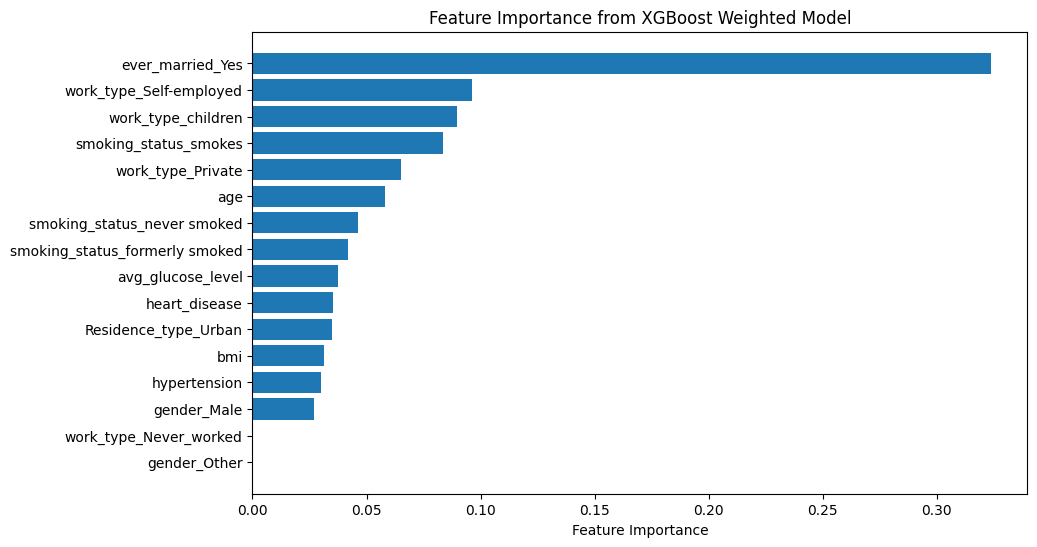

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the model (gain or weight)
importances = xgb_model_weighted.feature_importances_

# Get feature names (columns of your training data)
feature_names = x_train_smote.columns

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance from XGBoost Weighted Model")
plt.gca().invert_yaxis()
plt.show()

# Optionally, print sorted feature import


In [ ]:
import joblib
joblib.dump(model, "model.pkl")


['model.pkl']

In [ ]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SyntaxError: invalid syntax (ipython-input-1673818982.py, line 2)